In [1]:
from monai.transforms import RandAxisFlip, RandRotate, RandShiftIntensity, RandAdjustContrast, RandRotate90, ResizeWithPadOrCrop, CenterSpatialCrop, RandSpatialCrop
from torchvision.transforms import Compose
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
output = torch.zeros((1, 61, 1000, 1000))
image = torch.tensor(np.array(cv2.imreadmulti("/home/sdejong/skinstression/data/stacks/10.tif")[1]))
output[:, :image.shape[0], ...] = image
# output = image.unsqueeze(0)

In [3]:
output.shape

torch.Size([1, 61, 1000, 1000])

torch.Size([10, 500, 500])


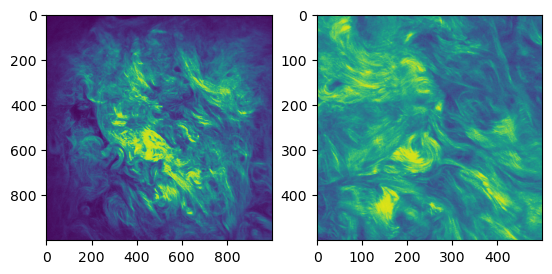

In [13]:
transform = Compose([
    ResizeWithPadOrCrop((31, 1000, 1000)),
    CenterSpatialCrop((31, 700, 700)),
    RandSpatialCrop((10, 500, 500), random_size=False),
    RandAxisFlip(prob=0.25),
    RandRotate90(prob=1/4, spatial_axes=(1, 2)),
    RandAdjustContrast(prob=1, gamma=(1, 0.4)),
])
transformed = transform(output)[0, :, :, :]
print(transformed.shape)
plt.subplot(121)
plt.imshow(output[0, 1, :, :], vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(transformed[0, :, :], vmin=0, vmax=255)